In [66]:
from sklearn.datasets import (make_classification, make_regression,
                              make_blobs, make_circles, make_moons)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import GridSearchCV
sns.set()

In [41]:
X, y = make_classification(n_samples=10000,n_features=5,n_classes=3,n_informative=3)

In [42]:
df = pd.DataFrame(np.column_stack((X,y)),columns=['f1','f2','f3','f4','f5','labels'])

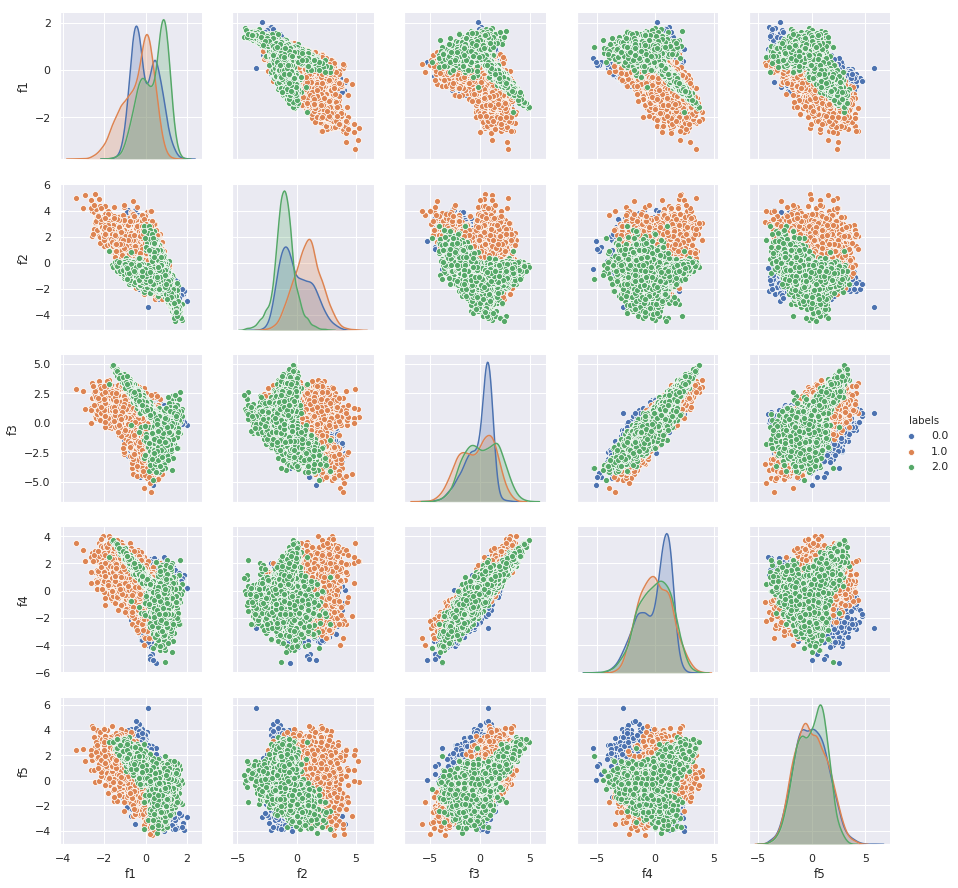

In [43]:
sns.pairplot(df, hue='labels',vars=df.columns[:-1])
plt.show()

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)

In [45]:
rf_clf = RandomForestClassifier(n_estimators=100,n_jobs=-1)

In [50]:
rf_fit = rf_clf.fit(X_train, y_train)

In [51]:
rf_fit.feature_importances_

array([0.23924519, 0.23874227, 0.1692497 , 0.17859863, 0.17416421])

In [55]:
y_pred = rf_fit.predict(X_test)

In [58]:
conf_mat = confusion_matrix(y_test,y_pred)

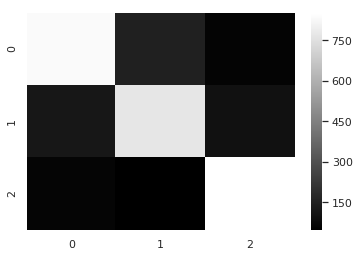

In [62]:
sns.heatmap(conf_mat,cmap='gray')

In [64]:
def train_RF(n_est, depth):
    rf = RandomForestClassifier(n_estimators=n_est, max_depth=depth, n_jobs=-1)
    rf_model = rf.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    precision, recall, fscore, support = score(y_test, y_pred, average='weighted')
    print('Est: {} / Depth: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
    n_est, depth, round(precision, 3), round(recall,3), round((y_pred == y_test).sum()/len(y_pred),3)))

In [65]:
for n_est in [10, 50, 100]:
    for depth in [10, 20, 30, None]:
        train_RF(n_est, depth)

Est: 10 / Depth: 10 ---- Precision: 0.808 / Recall: 0.808 / Accuracy: 0.808
Est: 10 / Depth: 20 ---- Precision: 0.814 / Recall: 0.815 / Accuracy: 0.815
Est: 10 / Depth: 30 ---- Precision: 0.81 / Recall: 0.81 / Accuracy: 0.81
Est: 10 / Depth: None ---- Precision: 0.813 / Recall: 0.813 / Accuracy: 0.813
Est: 50 / Depth: 10 ---- Precision: 0.815 / Recall: 0.816 / Accuracy: 0.816
Est: 50 / Depth: 20 ---- Precision: 0.816 / Recall: 0.817 / Accuracy: 0.817
Est: 50 / Depth: 30 ---- Precision: 0.818 / Recall: 0.819 / Accuracy: 0.819
Est: 50 / Depth: None ---- Precision: 0.816 / Recall: 0.817 / Accuracy: 0.817
Est: 100 / Depth: 10 ---- Precision: 0.814 / Recall: 0.814 / Accuracy: 0.814
Est: 100 / Depth: 20 ---- Precision: 0.82 / Recall: 0.821 / Accuracy: 0.821
Est: 100 / Depth: 30 ---- Precision: 0.816 / Recall: 0.817 / Accuracy: 0.817
Est: 100 / Depth: None ---- Precision: 0.817 / Recall: 0.817 / Accuracy: 0.817


In [68]:
rf = RandomForestClassifier()
param = {
    'n_estimators': [10,150,300] ,
    'max_depth': [30,60,90,None]
}
gs = GridSearchCV(rf, param, cv=5, n_jobs=-1)
gs_fit = gs.fit(X, y)
results = pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:1

In [70]:
results[['mean_test_score','params']]

,mean_test_score,params
11,0.8319,"{'n_estimators': 300, 'max_depth': None}"
8,0.8317,"{'n_estimators': 300, 'max_depth': 90}"
2,0.8311,"{'n_estimators': 300, 'max_depth': 30}"
7,0.8308,"{'n_estimators': 150, 'max_depth': 90}"
5,0.8305,"{'n_estimators': 300, 'max_depth': 60}"
4,0.8303,"{'n_estimators': 150, 'max_depth': 60}"
10,0.8302,"{'n_estimators': 150, 'max_depth': None}"
1,0.8292,"{'n_estimators': 150, 'max_depth': 30}"
3,0.8166,"{'n_estimators': 10, 'max_depth': 60}"
9,0.8166,"{'n_estimators': 10, 'max_depth': None}"
